In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np


In [125]:
import warnings
warnings.filterwarnings("ignore")
best_oob = 0
for k in ['KNN_','pca_KNN_']:
    for i in [7,8,9,10]:
        for t in ['y_1','y_2']:
            clusters = pd.read_csv(k+str(i)+'.csv')
            street_full = pd.read_csv("streets_full.csv")
            collision = pd.read_csv("st_collision_sgmt_level.csv")
            #street_full.isnull().sum()/len(street_full)

            for col_ in ['speed_limit', 'pk_metered_cnt', 'pk_on_st_cnt',
                   'oneway_yn', 'daily_ride_qrt']:
                if col_ == 'daily_ride_qrt':
                    street_full[col_] = street_full[col_].fillna(street_full[col_].median())
                else:
                    street_full[col_] = street_full[col_].fillna(street_full[col_].value_counts().index[0])

            street_full.fillna('Missing', inplace = True)    
            ####merge
            df = pd.merge(collision[['cnn_sgmt_fkey','y_1','y_2']], street_full,
                     left_on = 'cnn_sgmt_fkey',right_on = 'cnn_sgmt_pkey', how = 'inner')
            df = pd.merge(df, clusters, left_on = 'f_node_cnn_intrsctn_fkey', 
                     right_on = 'Segment', how = 'left')
            df = pd.merge(df, clusters, left_on = 't_node_cnn_intrsctn_fkey', 
                     right_on = 'Segment', how = 'left')
            ###

            features_ = ['cyc_ntwrk_yn', 'speed_limit', 'pk_metered_cnt',
             'pk_on_st_cnt', 'oneway_yn', 'daily_ride_qrt', 'facility_type',
             'surface_type', 'sharrow', 'Cluster_x',  'Cluster_y']
            target_ = t
            

            X = df[features_]
            y = df[target_]
            mask_ = ~np.isinf(y)
            X = df[features_][mask_]
            y = df[target_][mask_]
            X.fillna(X.median(), inplace = True) #some missing intercepts
            X = pd.get_dummies(X)

            ##


            parameters = {'max_depth':[5,6,7],
                          'max_features':[10,12,14],
                         'n_estimators': [300,500]}
            rf = RandomForestRegressor(random_state= 0)
            regr = GridSearchCV(rf, parameters, cv=10)
            regr.fit(X,y)
            print('For: '+k+str(i)+' and '+t)
            print(regr.best_params_)
            rf_best = RandomForestRegressor(**regr.best_params_, random_state = 0, oob_score= True)
            rf_best.fit(X,y)
            print(rf_best.oob_score_)
            print('-------------')
            if rf_best.oob_score_ > best_oob:
                best_oob = rf_best.oob_score_
                best_comb = k+str(i)+' and '+t

For: KNN_7 and y_1
{'max_depth': 6, 'max_features': 10, 'n_estimators': 300}
0.07356424401510675
-------------
For: KNN_7 and y_2
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
0.4999654102655794
-------------
For: KNN_8 and y_1
{'max_depth': 6, 'max_features': 10, 'n_estimators': 300}
0.07284730773667958
-------------
For: KNN_8 and y_2
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
0.4712771280204747
-------------
For: KNN_9 and y_1
{'max_depth': 7, 'max_features': 10, 'n_estimators': 300}
0.050224403765977144
-------------
For: KNN_9 and y_2
{'max_depth': 5, 'max_features': 10, 'n_estimators': 300}
0.478107630404623
-------------
For: KNN_10 and y_1
{'max_depth': 5, 'max_features': 10, 'n_estimators': 300}
0.07457913046688547
-------------
For: KNN_10 and y_2
{'max_depth': 5, 'max_features': 10, 'n_estimators': 300}
0.44829764938191996
-------------
For: pca_KNN_7 and y_1
{'max_depth': 7, 'max_features': 10, 'n_estimators': 300}
0.048589682731222994
-----------

In [126]:
best_comb

'KNN_7 and y_2'

In [131]:
#final fit

for k in ['KNN_']:
    for i in [7]:
        for t in ['y_2']:
            clusters = pd.read_csv(k+str(i)+'.csv')
            street_full = pd.read_csv("streets_full.csv")
            collision = pd.read_csv("st_collision_sgmt_level.csv")
            #street_full.isnull().sum()/len(street_full)

            for col_ in ['speed_limit', 'pk_metered_cnt', 'pk_on_st_cnt',
                   'oneway_yn', 'daily_ride_qrt']:
                if col_ == 'daily_ride_qrt':
                    street_full[col_] = street_full[col_].fillna(street_full[col_].median())
                else:
                    street_full[col_] = street_full[col_].fillna(street_full[col_].value_counts().index[0])

            street_full.fillna('missing', inplace = True)    
            ####merge
            df = pd.merge(collision[['cnn_sgmt_fkey','y_1','y_2']], street_full,
                     left_on = 'cnn_sgmt_fkey',right_on = 'cnn_sgmt_pkey', how = 'inner')
            df = pd.merge(df, clusters, left_on = 'f_node_cnn_intrsctn_fkey', 
                     right_on = 'Segment', how = 'left')
            df = pd.merge(df, clusters, left_on = 't_node_cnn_intrsctn_fkey', 
                     right_on = 'Segment', how = 'left')
            ###

            features_ = ['cyc_ntwrk_yn', 'speed_limit', 'pk_metered_cnt',
             'pk_on_st_cnt', 'oneway_yn', 'daily_ride_qrt', 'facility_type',
             'surface_type', 'sharrow', 'Cluster_x',  'Cluster_y']
            target_ = t
            

            X = df[features_]
            y = df[target_]
            mask_ = ~np.isinf(y)
            X = df[features_][mask_]
            y = df[target_][mask_]
            X.fillna(X.median(), inplace = True) #some missing intercepts
            X = pd.get_dummies(X)

            ##


            parameters = {'max_depth':[5,6,7,8,9],
                          'max_features':[8,10,12,14,16],
                         'n_estimators': [150,300,500]}
            rf = RandomForestRegressor(random_state= 0)
            regr = GridSearchCV(rf, parameters, cv=10)
            regr.fit(X,y)
            print('For: '+k+str(i)+' and '+t)
            print(regr.best_params_)
            rf_best = RandomForestRegressor(**regr.best_params_, random_state = 0, oob_score= True)
            rf_best.fit(X,y)
            print(rf_best.oob_score_)
            print('-------------')
            

For: KNN_7 and y_2
{'max_depth': 5, 'max_features': 8, 'n_estimators': 500}
0.4615855280943849
-------------


In [173]:
#pd.DataFrame({'feature': X.columns, 'imp':rf_best.feature_importances_}).sort_values(by = ['imp'], ascending=False).to_csv("feature_imp.csv", index = False)
pd.DataFrame({'feature': X.columns, 'imp':rf_best.feature_importances_}).sort_values(by = ['imp'], ascending=False)

,feature,imp
3,daily_ride_qrt,0.806636
0,speed_limit,0.045832
5,Cluster_y,0.035229
4,Cluster_x,0.029852
2,pk_on_st_cnt,0.020731
1,pk_metered_cnt,0.017457
12,facility_type_BIKE ROUTE,0.010075
18,sharrow_YES,0.009157
17,sharrow_NO,0.006252
9,oneway_yn_YES,0.004884


In [132]:
df = pd.merge(street_full, clusters, left_on = 'f_node_cnn_intrsctn_fkey', right_on = 'Segment', how = 'left')
df = pd.merge(df, clusters, left_on = 't_node_cnn_intrsctn_fkey', right_on = 'Segment', how = 'left')




In [133]:
X = df[features_]
X.fillna(X.median(), inplace = True) #some missing intercepts
X = pd.get_dummies(X)

In [143]:
export_columns = ['cnn_sgmt_pkey', 'f_node_cnn_intrsctn_fkey', 't_node_cnn_intrsctn_fkey',
       'cyc_ntwrk_yn', 'speed_limit', 'pk_metered_cnt', 'pk_on_st_cnt',
       'oneway_yn', 'daily_ride_qrt', 'facility_type', 'surface_type',
       'sharrow', 'Cluster_x','Cluster_y']

In [144]:
predict_score = rf_best.predict(X)
export_df = df[export_columns]
export_df['Score_y2'] = predict_score

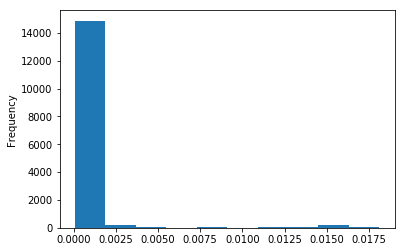

In [150]:
export_df['Score_y2'].plot.hist()

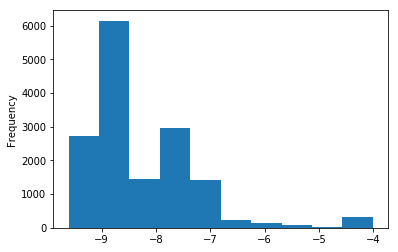

In [149]:
np.log(export_df['Score_y2']).plot.hist()

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler((50,100))
scaler.fit(np.array(np.log(export_df['Score_y2'])).reshape(-1,1))
scaled_score = scaler.transform(np.array(np.log(export_df['Score_y2'])).reshape(-1,1))
export_df['Scale_Score_y2'] = scaled_score


In [164]:
export_df.to_csv("Safe Score Segments DataFrame.csv", index = False)